In [1]:
# Import needed libraries. Load the DF. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fires.csv")

/var/folders/n5/2wsllrvs6h9862hcd58z1ybh0000gn/T/ipykernel_19243/4120368942.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fires.csv")


In [3]:
df.head()

FIRE_NAME  FIRE_SIZE STATE   LATITUDE   LONGITUDE  FIRE_YEAR  \
0  FOUNTAIN       0.10    CA  40.036944 -121.005833       2005   
1    PIGEON       0.25    CA  38.933056 -120.404444       2004   
2     SLACK       0.10    CA  38.984167 -120.735556       2004   
3      DEER       0.10    CA  38.559167 -119.913333       2004   
4  STEVENOT       0.10    CA  38.559167 -119.933056       2004   

        discovery_date         contain_date  
0  2005-02-02 00:00:00  2005-02-02 00:00:00  
1  2004-05-12 00:00:00  2004-05-12 00:00:00  
2  2004-05-31 00:00:00  2004-05-31 00:00:00  
3  2004-06-28 00:00:00  2004-07-03 00:00:00  
4  2004-06-28 00:00:00  2004-07-03 00:00:00

#### (I) Explore the data:





Q1. Find the dimensions of the DF. Make the colnames lowercase.

In [4]:
print(df.shape)
print(df.columns)
df.columns = [x.lower() for x in df.columns]
print(df.columns)


(1880465, 8)
Index(['FIRE_NAME', 'FIRE_SIZE', 'STATE', 'LATITUDE', 'LONGITUDE', 'FIRE_YEAR',
       'discovery_date', 'contain_date'],
      dtype='object')
Index(['fire_name', 'fire_size', 'state', 'latitude', 'longitude', 'fire_year',
       'discovery_date', 'contain_date'],
      dtype='object')


Q2. Rename the column `fire_size` to `acres_burned`.


In [5]:
df =  df.rename({"fire_size":"acres_burned"}, axis=1)
# df =  df.rename(columns={"fire_size":"acres_burned"}) # Another method
df.columns

Index(['fire_name', 'acres_burned', 'state', 'latitude', 'longitude',
       'fire_year', 'discovery_date', 'contain_date'],
      dtype='object')

Q3. Convert the data in the `fire_name` column such that the data starts with a capital letter. (ie `PIGEON` -> `Pigeon`)

In [6]:
df['fire_name'].head()

0    FOUNTAIN
1      PIGEON
2       SLACK
3        DEER
4    STEVENOT
Name: fire_name, dtype: object

In [7]:
df['fire_name']=df['fire_name'].str.capitalize()

In [8]:
df['fire_name'].head()


0    Fountain
1      Pigeon
2       Slack
3        Deer
4    Stevenot
Name: fire_name, dtype: object

Q4. Drop unnecessary rows- having fire size less than 10 acres.

In [9]:
df.acres_burned.describe()

count    1.880465e+06
mean     7.452016e+01
std      2.497598e+03
min      1.000000e-05
25%      1.000000e-01
50%      1.000000e+00
75%      3.300000e+00
max      6.069450e+05
Name: acres_burned, dtype: float64

In [10]:
df = df[df['acres_burned']>=10]


In [11]:
df.acres_burned.describe()

count    274170.000000
mean        503.470402
std        6524.538544
min          10.000000
25%          15.000000
50%          27.000000
75%          70.900000
max      606945.000000
Name: acres_burned, dtype: float64

In [12]:
df.shape
# 1641510 were deleted

(274170, 8)


Q5. Drop duplicate rows, if any. If so, keep the first duplicate of each such duplicate set.


In [13]:
df = df.drop_duplicates(keep="first")
df.shape
# 24 rows were deleted

(274123, 8)


Q6. Ensure that the `date` columns have the correct datatype.


In [14]:
print(df['discovery_date'].dtype )
print(df['contain_date'].dtype )

#contain_date



object
object


In [15]:
df['contain_date'] = pd.to_datetime(df['contain_date'])
df['discovery_date'] = pd.to_datetime(df['discovery_date'])
print(df['discovery_date'].dtype )
print(df['contain_date'].dtype )

datetime64[ns]
datetime64[ns]


In [16]:
# pd.to_datetime(df["discovery_date"],infer_datetime_format=True)
# nonull values, any non null value, detect the format, and apply to the rest


Q7. Check for missing values in the `contain_date` column. Find the number.

a) Check for missing values of  `contain_date`  where fires exceed 10000 acres.

b) Check the values of  `contain_date` to see if they are reasonable.


In [17]:
df[df['contain_date'].isna()]
#114833 Rows

fire_name  acres_burned state   latitude   longitude  fire_year  \
1566      Seven springs         85.00    MO  36.992500  -92.186111       2005   
5095             Peppin      64488.00    NM  33.601389 -105.433333       2004   
5740     Rochelle hills        230.00    WY  43.571667 -105.085833       2005   
8187              Knife        560.00    AZ  35.132778 -111.399444       2006   
10883             Grant        190.00    AZ  33.626111 -109.248889       2006   
...                 ...           ...   ...        ...         ...        ...   
1880206        Ranchita         24.20    CA  35.805000 -120.575000       2010   
1880316             NaN         24.74    CA  35.271667 -118.617967       2013   
1880352      San marcos         70.00    CA  38.020433 -121.982883       2010   
1880419  Slaughterhouse         50.00    CA  32.906591 -116.942448       2010   
1880441             NaN         11.00    CA  34.450000 -118.583333       2015   

        discovery_date contain_date  
1566        2005-03-17          NaT  
5095        2004-05-15          NaT  
5740        2005-08-26          NaT  
8187        2006-05-27          NaT  
10883       2006-07-19          NaT  
...                ...          ...  
1880206     2010-06-21          NaT  
1880316     2013-05-25          NaT  
1880352     2010-08-23          NaT  
1880419     2010-05-29          NaT  
1880441     2015-12-07          NaT  

[136747 rows x 8 columns]

In [18]:
# a) Check for missing values of contain_date where fires exceed 10000 acres.
df[(df['contain_date'].isna()) & (df['acres_burned']>10000)]

## there is another method called. Query, it works similar than filtering

df.query('contain_date == "NaT" & acres_burned > 10000')

# 263 Rows - NAT instead of NAN

fire_name  acres_burned state   latitude   longitude  \
5095              Peppin       64488.0    NM  33.601389 -105.433333   
26127           Butler 2       14039.0    CA  34.258056 -117.010278   
32272              Chalk       11200.0    CA  36.002500 -121.439722   
33100       South barker       37725.0    ID  43.625278 -115.228889   
239801          Anaconda       10812.0    MT  48.645160 -114.128000   
...                  ...           ...   ...        ...         ...   
1860048  Guttersen ranch       11699.0    CO  40.394700 -104.564600   
1868221              NaN       12453.0    HI  21.095810 -157.007416   
1869553              NaN       25000.0    HI  20.000641 -155.691620   
1877519           Valley       76067.0    CA  38.843988 -122.759707   
1878523         Humboldt       23344.0    CA  39.762464 -121.736696   

         fire_year discovery_date contain_date  
5095          2004     2004-05-15          NaT  
26127         2007     2007-09-14          NaT  
32272         2008     2008-09-27          NaT  
33100         2008     2008-08-07          NaT  
239801        1999     1999-08-06          NaT  
...            ...            ...          ...  
1860048       2015     2015-09-18          NaT  
1868221       1998     1998-08-23          NaT  
1869553       2005     2005-08-01          NaT  
1877519       2015     2015-09-12          NaT  
1878523       2008     2008-06-11          NaT  

[263 rows x 8 columns]

In [19]:
#b) Check the values of contain_date to see if they are reasonable.
_list=(df['contain_date'].tolist())
_list.sort()
print(len(_list))
print(set(_list[::1000]))
# The information of the dates, iclude a time of 0:0, probably was not there when converted, therfore, it set it as 0:0,
# Also, The time is not sorted. as the lenght of the list is too long, it is not recommended to print all of it.

274123
{NaT, Timestamp('2013-03-19 00:00:00'), Timestamp('1994-03-18 00:00:00'), Timestamp('2006-01-16 00:00:00'), Timestamp('1992-04-18 00:00:00'), Timestamp('1995-04-11 00:00:00'), Timestamp('2013-11-19 00:00:00'), Timestamp('2014-05-23 00:00:00'), Timestamp('2003-11-07 00:00:00'), Timestamp('2011-03-22 00:00:00'), Timestamp('2007-04-21 00:00:00'), Timestamp('2014-04-09 00:00:00'), Timestamp('2000-10-02 00:00:00'), Timestamp('2012-07-07 00:00:00'), Timestamp('1996-03-10 00:00:00'), Timestamp('1996-02-14 00:00:00'), Timestamp('2013-04-10 00:00:00'), Timestamp('2015-03-18 00:00:00'), Timestamp('2006-04-10 00:00:00'), Timestamp('2012-09-10 00:00:00'), Timestamp('2010-12-24 00:00:00'), Timestamp('2007-11-20 00:00:00'), Timestamp('2012-03-17 00:00:00'), Timestamp('2002-07-14 00:00:00'), Timestamp('2000-08-27 00:00:00'), Timestamp('2001-04-13 00:00:00'), Timestamp('2012-11-11 00:00:00'), Timestamp('2015-03-08 00:00:00'), Timestamp('2010-09-01 00:00:00'), Timestamp('2002-12-09 00:00:00'), T

#### (II) Prepare the data:

Q9. Add the `fire_month` and `days_burning` columns

In [20]:
df.head(1)

fire_name  acres_burned state   latitude   longitude  fire_year  \
16     Power       16823.0    CA  38.523333 -120.211667       2004   

   discovery_date contain_date  
16     2004-10-06   2004-10-21

In [21]:
df[['fire_month','days_burning']] = np.nan

In [22]:
# df['fire_month'] = ((df['contain_date'] - df['discovery_date']).dt.days/30)
df['fire_month'] = df['contain_date'].dt.month
df.head()

fire_name  acres_burned state   latitude   longitude  fire_year  \
16         Power       16823.0    CA  38.523333 -120.211667       2004   
17         Freds        7700.0    CA  38.780000 -120.260000       2004   
25      Bachelor          10.0    NM  33.315833 -105.512222       2004   
37    Howard gap          50.3    NC  35.000278  -83.351111       2005   
39  Austin creek         125.0    NC  36.001667  -81.590000       2005   

   discovery_date contain_date  fire_month  days_burning  
16     2004-10-06   2004-10-21        10.0           NaN  
17     2004-10-13   2004-10-17        10.0           NaN  
25     2004-07-20   2004-07-20         7.0           NaN  
37     2005-01-27   2005-01-28         1.0           NaN  
39     2005-02-12   2005-02-13         2.0           NaN

In [23]:
df['days_burning'] = (df['contain_date']-df['discovery_date']).dt.days
# df['days_burning'] = (df['contain_date']-df['discovery_date']).dt.days.filna(-1).astype('int')
# df['days_burning']=df['days_burning'].astype('int')
df.head()

fire_name  acres_burned state   latitude   longitude  fire_year  \
16         Power       16823.0    CA  38.523333 -120.211667       2004   
17         Freds        7700.0    CA  38.780000 -120.260000       2004   
25      Bachelor          10.0    NM  33.315833 -105.512222       2004   
37    Howard gap          50.3    NC  35.000278  -83.351111       2005   
39  Austin creek         125.0    NC  36.001667  -81.590000       2005   

   discovery_date contain_date  fire_month  days_burning  
16     2004-10-06   2004-10-21        10.0          15.0  
17     2004-10-13   2004-10-17        10.0           4.0  
25     2004-07-20   2004-07-20         7.0           0.0  
37     2005-01-27   2005-01-28         1.0           1.0  
39     2005-02-12   2005-02-13         2.0           1.0


Q10. Get the statistical summary of the `days_burning` column. What trends do you see in the 3rd quartile, mean and Max length of the fires? Is or isn't anything fishy?


In [24]:
df.describe()

acres_burned       latitude      longitude      fire_year  \
count  274123.000000  274123.000000  274123.000000  274123.000000   
mean      503.553366      35.567744     -94.556743    2003.646578   
std      6525.094778       6.028811      13.901451       6.590023   
min        10.000000      17.939722    -178.802600    1992.000000   
25%        15.000000      31.938285    -100.030450    1998.000000   
50%        27.000000      34.460000     -92.046944    2004.000000   
75%        71.000000      37.669211     -84.052953    2009.000000   
max    606945.000000      70.138100     -65.273611    2015.000000   

          fire_month   days_burning  
count  137376.000000  137376.000000  
mean        5.761319       3.254520  
std         3.052026      16.052833  
min         1.000000       0.000000  
25%         3.000000       0.000000  
50%         6.000000       0.000000  
75%         8.000000       1.000000  
max        12.000000    1881.000000

The time of fires last less than a day, and the max, takes up to 6 years.
The reason of some of these values is that contain_date have a lot of NaN, so the result is giving 0


Q11. Check the value of `days_burning` for fires that exceed 100 acres. What do you notice about the acreage and the `days_burning` for certain outliers?


In [25]:
df[df['days_burning']>100].describe()

acres_burned    latitude   longitude    fire_year  fire_month  \
count     514.000000  514.000000  514.000000   514.000000  514.000000   
mean    31464.418444   48.340099 -123.322975  2006.669261   10.083658   
std     73486.871795   11.619224   18.555181     5.342422    1.761292   
min        10.000000   19.287290 -158.752400  1992.000000    1.000000   
25%       325.250000   39.976042 -142.463054  2003.000000    9.000000   
50%      2771.000000   45.853889 -118.455085  2007.000000   10.000000   
75%     23884.500000   63.170833 -113.142188  2010.000000   11.000000   
max    537627.000000   69.336700  -75.761400  2015.000000   12.000000   

       days_burning  
count    514.000000  
mean     147.832685  
std      141.368262  
min      101.000000  
25%      107.000000  
50%      118.000000  
75%      136.750000  
max     1881.000000

The time of days burning, it is relative to the size of acres. 
It takes more time to contain a fire if the fire is too wide

#### (III) Biz Q's:

For California:

BQ1. Plot the maximum fire size, per year.

In [26]:
df.head()

fire_name  acres_burned state   latitude   longitude  fire_year  \
16         Power       16823.0    CA  38.523333 -120.211667       2004   
17         Freds        7700.0    CA  38.780000 -120.260000       2004   
25      Bachelor          10.0    NM  33.315833 -105.512222       2004   
37    Howard gap          50.3    NC  35.000278  -83.351111       2005   
39  Austin creek         125.0    NC  36.001667  -81.590000       2005   

   discovery_date contain_date  fire_month  days_burning  
16     2004-10-06   2004-10-21        10.0          15.0  
17     2004-10-13   2004-10-17        10.0           4.0  
25     2004-07-20   2004-07-20         7.0           0.0  
37     2005-01-27   2005-01-28         1.0           1.0  
39     2005-02-12   2005-02-13         2.0           1.0

<BarContainer object of 14299 artists>

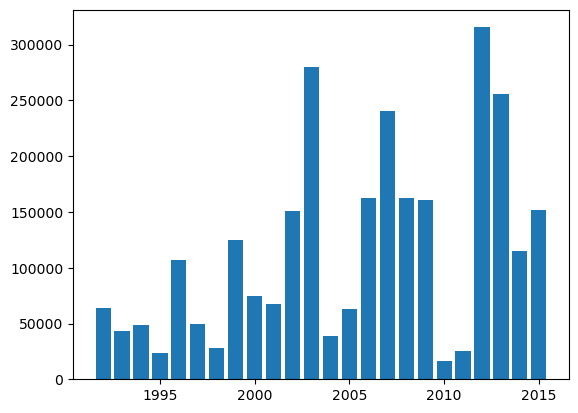

In [27]:
# df.plot(df[df['state']=='CA'],df['acres_burned'],kind='bar')

_=df[df['state']=='CA']
_.sort_values('fire_year')
plt.bar(_['fire_year'],_['acres_burned'])

# If i do not do groupby, the plot will take too long to plot

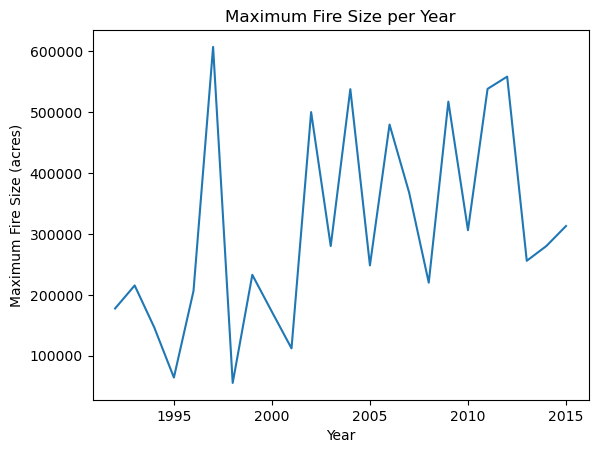

In [28]:
# Grouping the data by fire_year and finding the maximum acres_burned
max_fire_size = df.groupby('fire_year')['acres_burned'].max()

plt.plot(max_fire_size.index, max_fire_size.values)

plt.xlabel('Year')
plt.ylabel('Maximum Fire Size (acres)')
plt.title('Maximum Fire Size per Year')
plt.show()

<AxesSubplot:xlabel='Years'>

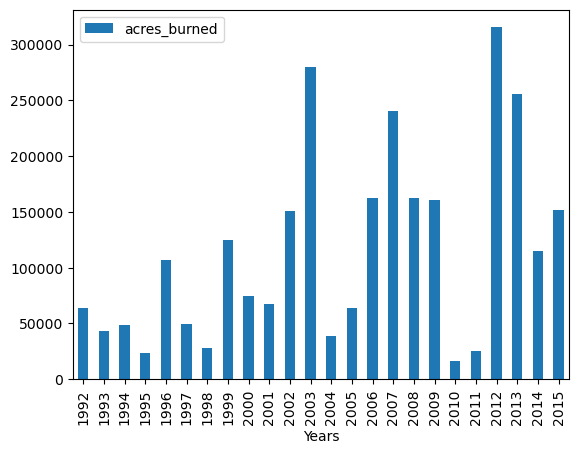

In [29]:
# Third option
df.query('state =="CA"').groupby("fire_year").agg({"acres_burned":"max"}).plot.bar(xlabel='Years')

For California:
    
BQ2. Plot the mean and median fire size, per year.

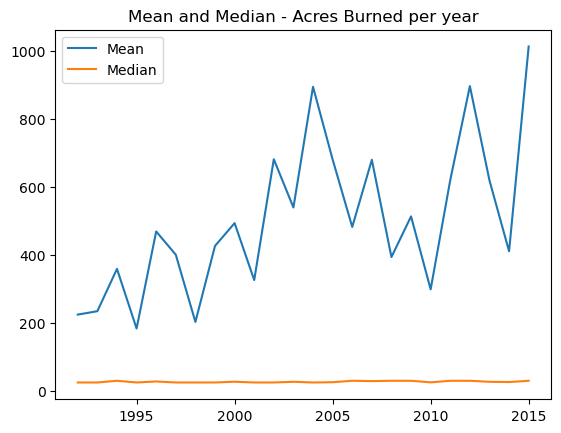

In [30]:
# groupby year, and using the fire_size, obtain the mean and median, plot both before plt.show()

fire_size = df.groupby("fire_year")['acres_burned']

plt.plot(fire_size.mean().index, fire_size.mean().values, label="Mean")
plt.plot(fire_size.median().index, fire_size.median().values, label="Median")
plt.title("Mean and Median - Acres Burned per year")
plt.legend()
plt.show()


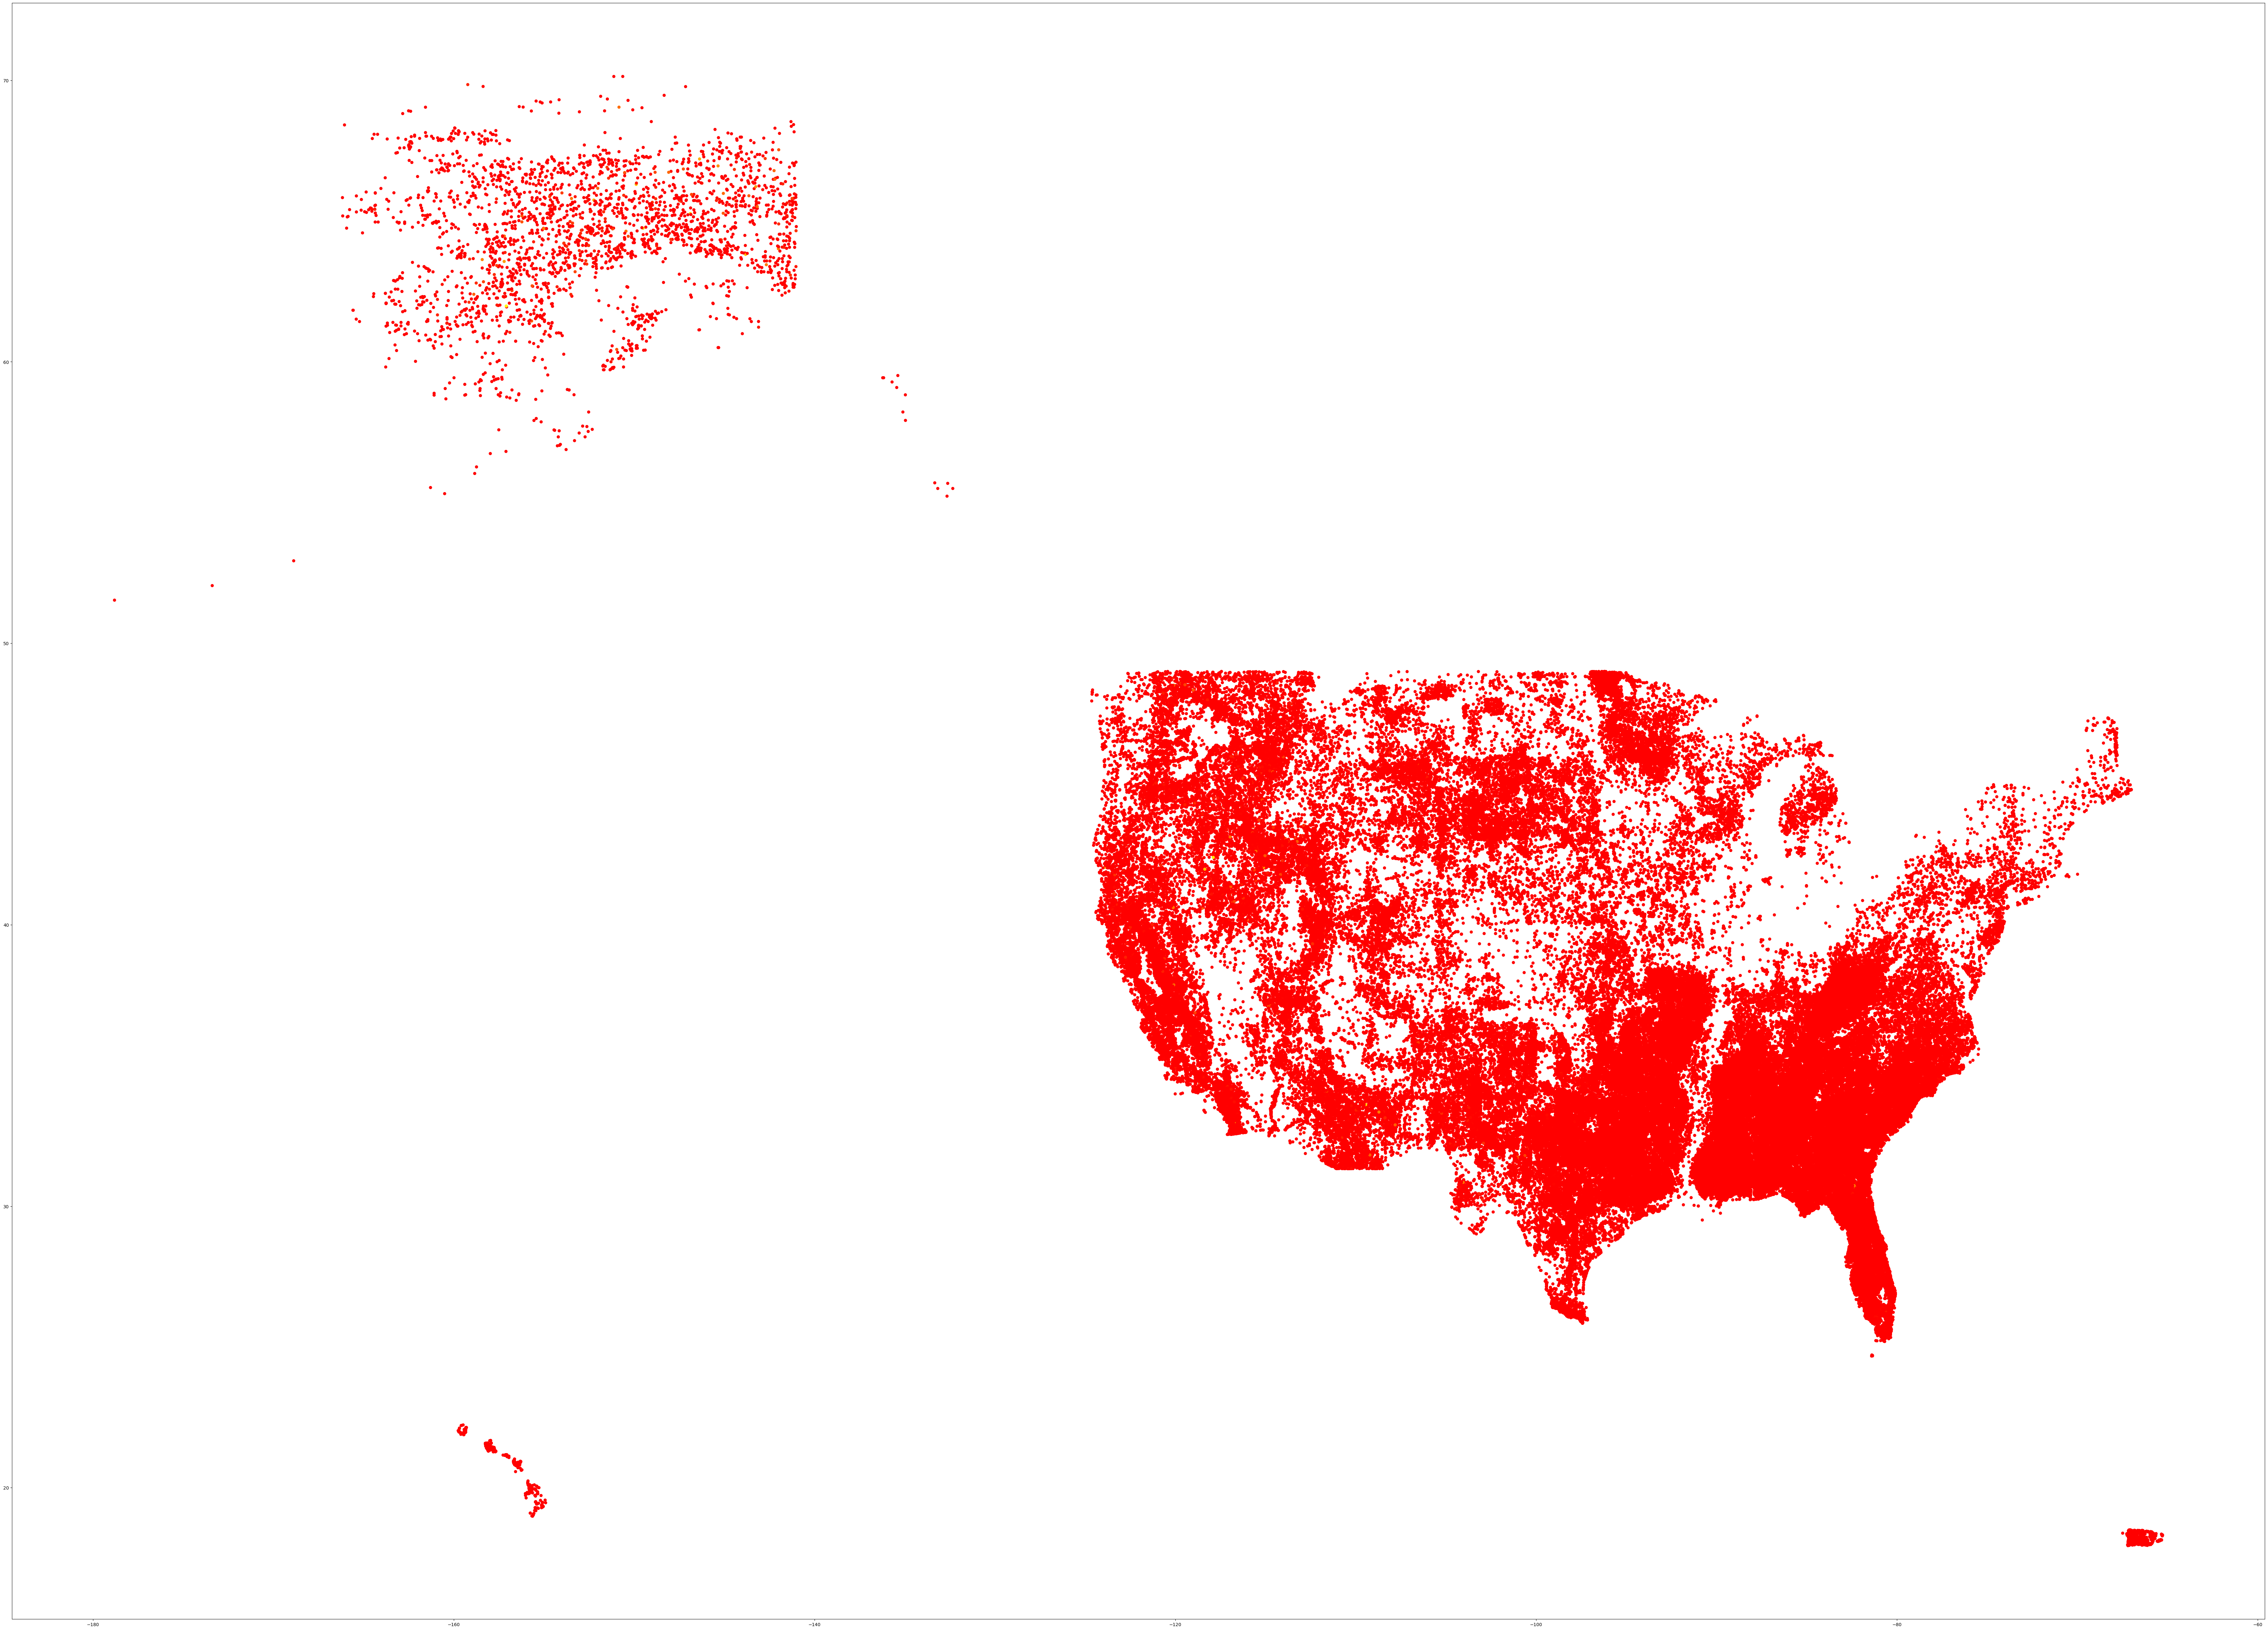

In [33]:
# PRINT THE WORLD MAP
normalized_values = (df['acres_burned'] - df['acres_burned'].min()) / (df['acres_burned'].max() - df['acres_burned'].min())

plt.scatter(x=df['longitude'], y=df['latitude'],c=normalized_values, cmap="autumn", vmin = 0, vmax=1)
plt.rcParams["figure.figsize"] = (40,25)
plt.show()

#### BG3 Which month has seen the highest Number of fires in California? (throughout all-time)

In [52]:
print("The max of acres burned everywhere is: ",df['acres_burned'].max())
# The max is not CA , but AK =>606945.0
print("In California, the month with highest number of acres burned is ", df['fire_month'][df['acres_burned'][df['state']=='CA'].max()==df['acres_burned']])
df[(df['acres_burned'][df['state']=='CA'].max()==df['acres_burned'])]

The max of acres burned everywhere is:  606945.0
In California, the month with highest number of acres burned is  1572842    10.0
Name: fire_month, dtype: float64


fire_name  acres_burned state  latitude  longitude  fire_year  \
1572842      Rush      315578.8    CA   40.6153  -120.1153       2012   

        discovery_date contain_date  fire_month  days_burning  
1572842     2012-08-12   2012-10-22        10.0          71.0

In [64]:
grouped_df = df[df['state']=='CA'].groupby('fire_month').size() # It is possible with count(), but will count all other columns
grouped_df

fire_month
1.0       70
2.0       32
3.0       80
4.0      154
5.0      569
6.0     1060
7.0     1551
8.0     1441
9.0      951
10.0     524
11.0     209
12.0      92
dtype: int64

In [61]:
df.query('state=="CA"').groupby('fire_month').agg({'state':'count'})

state
fire_month       
1.0            70
2.0            32
3.0            80
4.0           154
5.0           569
6.0          1060
7.0          1551
8.0          1441
9.0           951
10.0          524
11.0          209
12.0           92

<AxesSubplot:xlabel='fire_month', ylabel='Total number of fire incidents'>

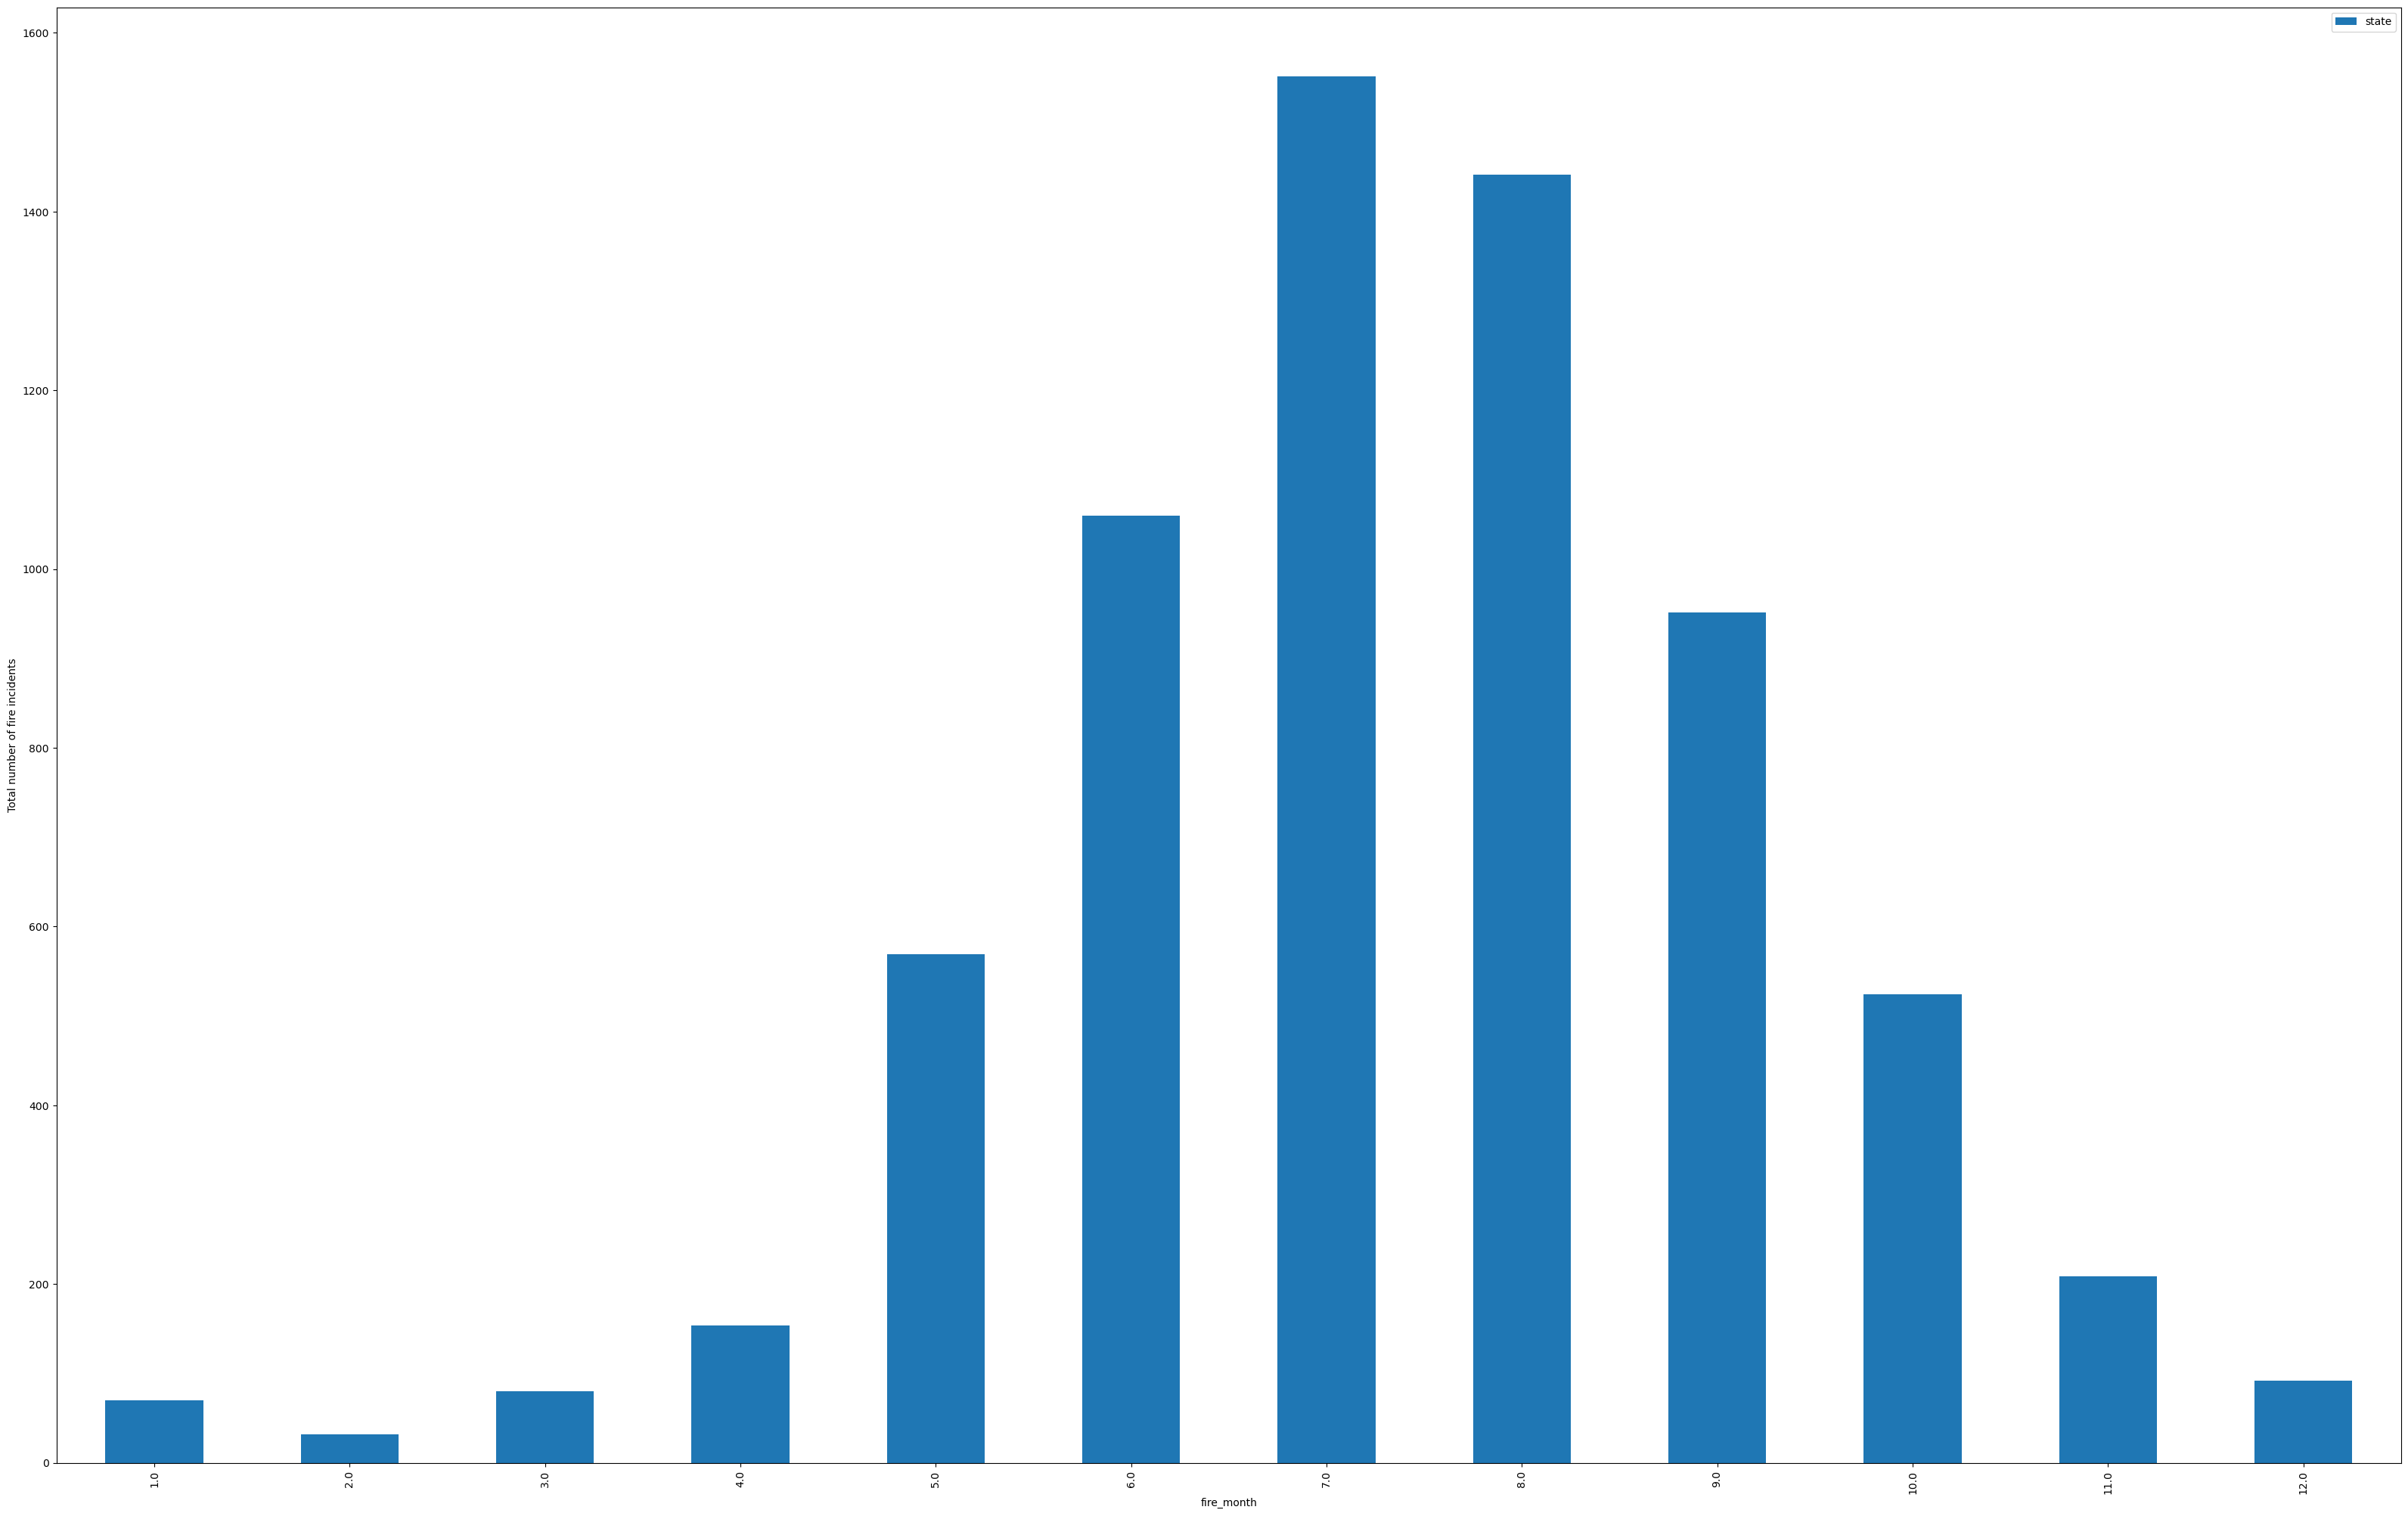

In [60]:
df.query('state=="CA"').groupby('fire_month').agg({'state':'count'}).plot.bar(ylabel="Total number of fire incidents")

In [70]:
print(" The month with max fires on the state of California is:", df.query('state=="CA"').groupby('fire_month').agg({'state':'count'}).max())



 The month with max fires on the state of California is: state    1551
dtype: int64


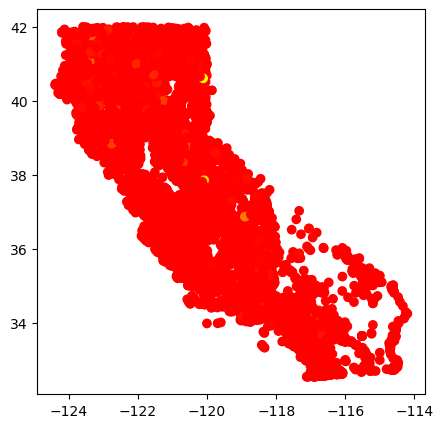

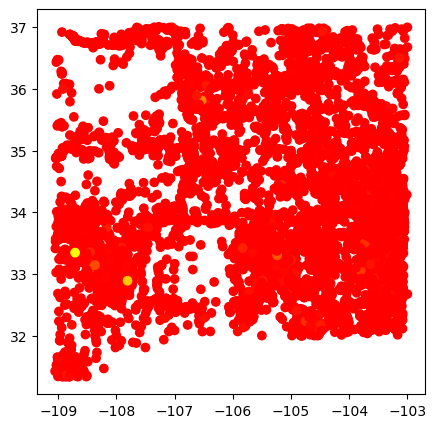

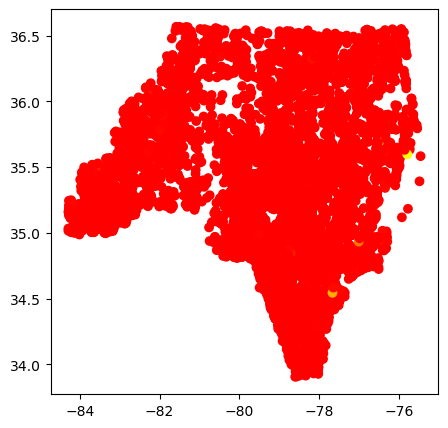

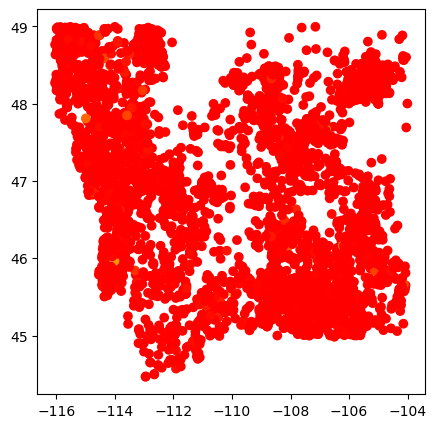

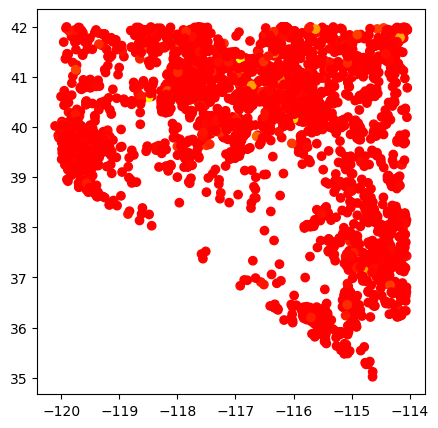

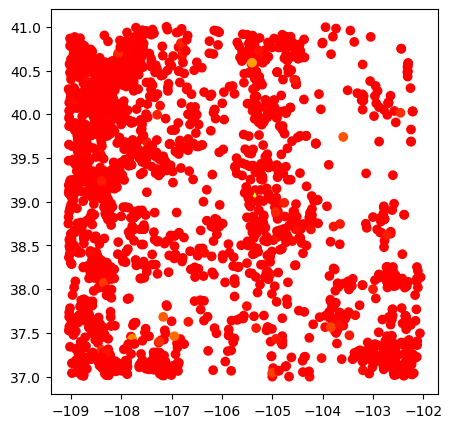

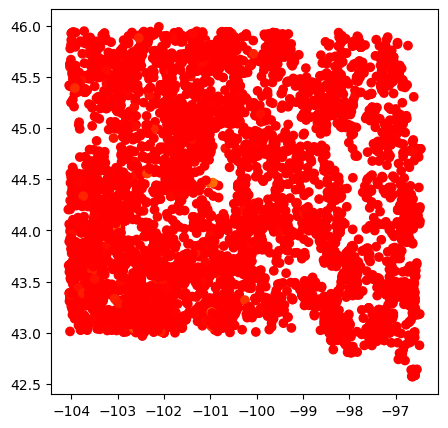

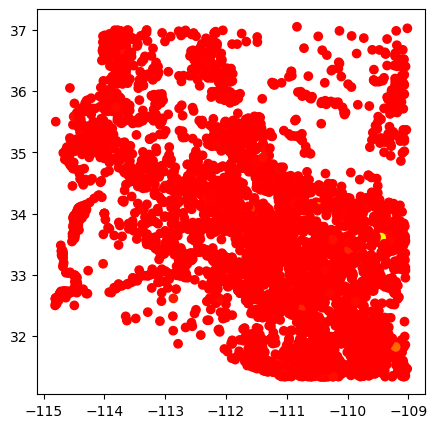

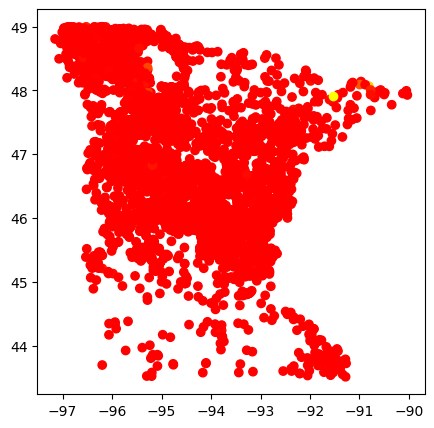

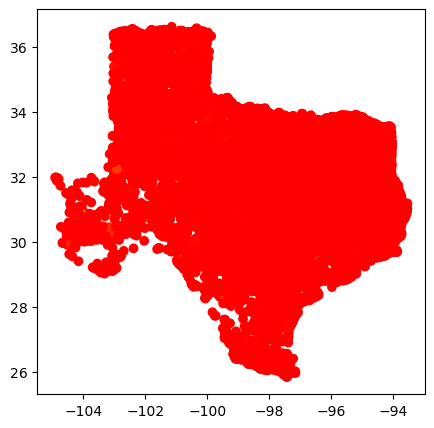

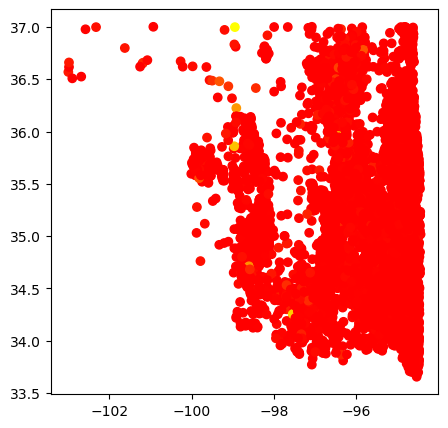

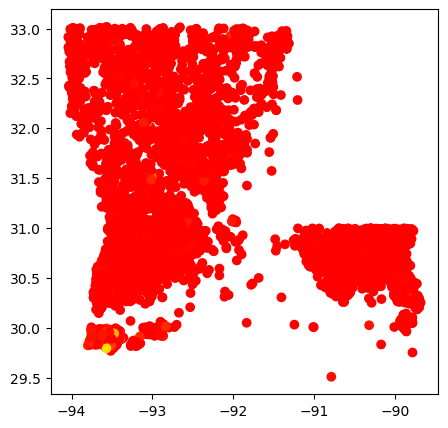

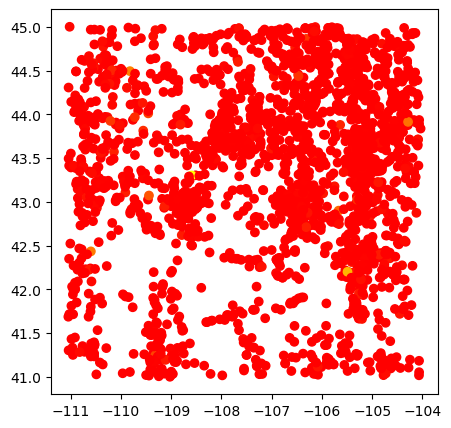

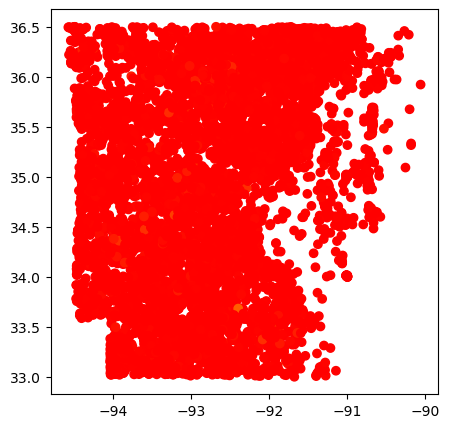

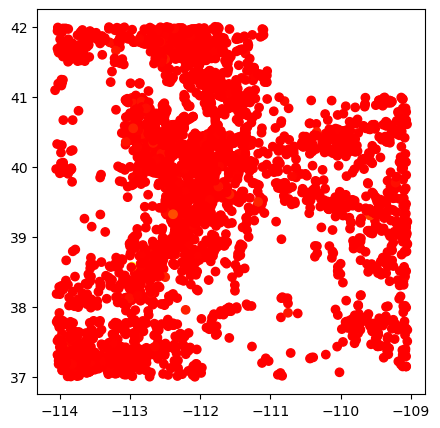

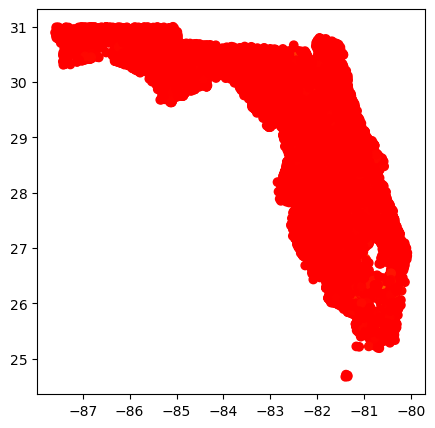

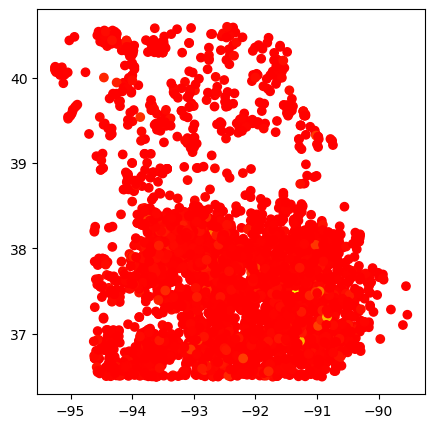

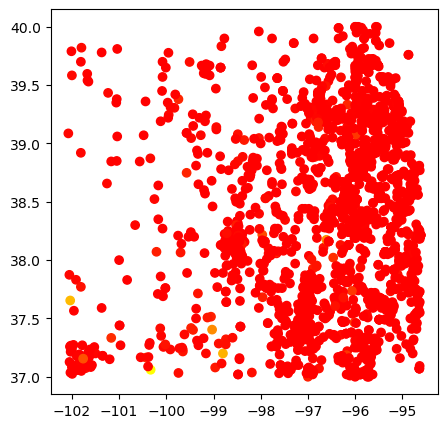

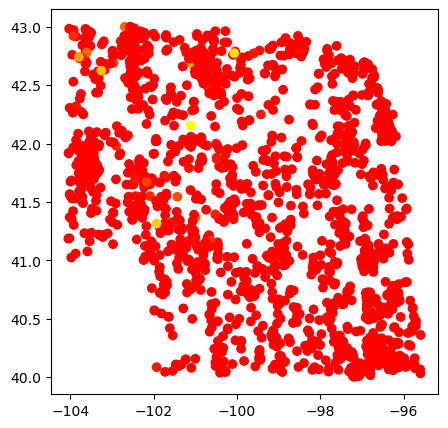

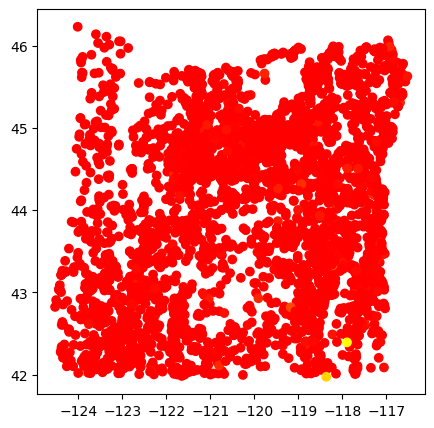

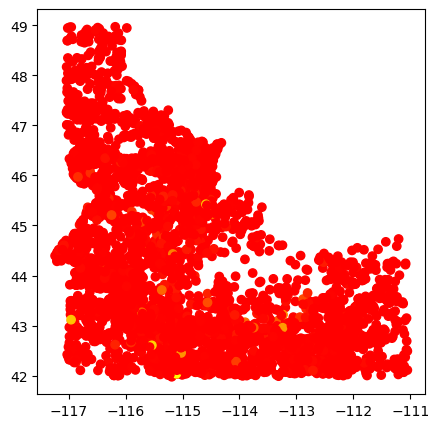

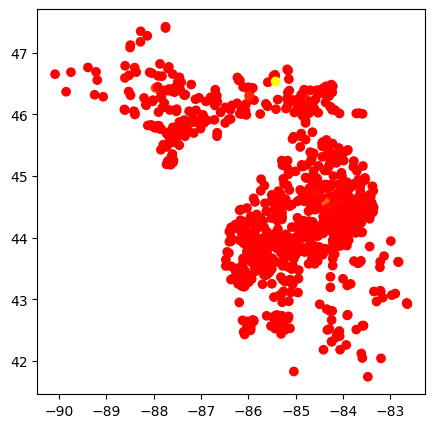

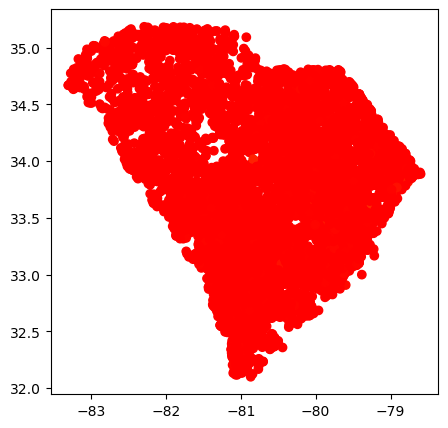

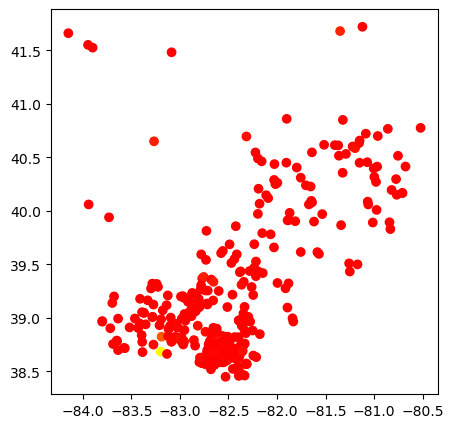

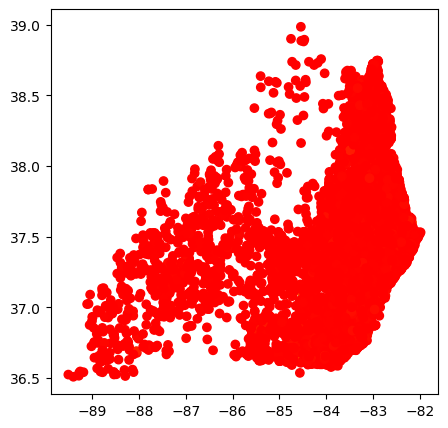

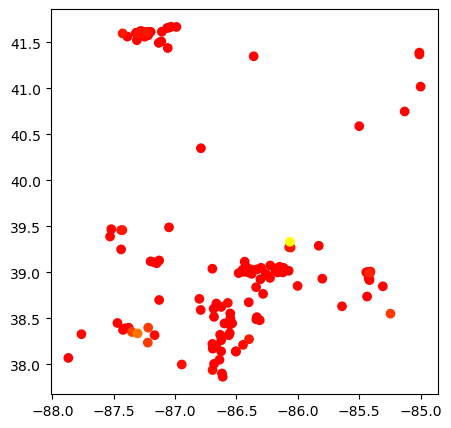

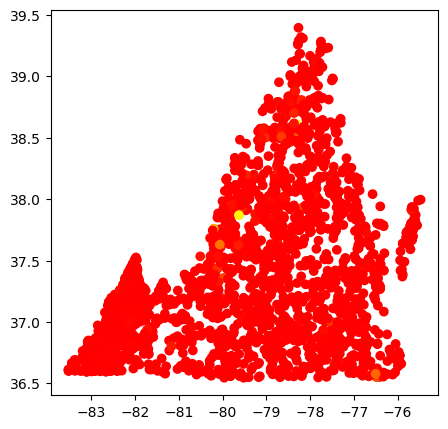

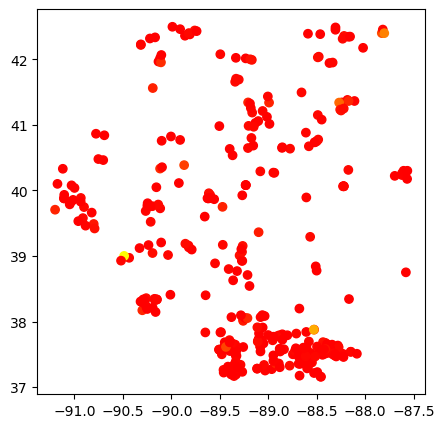

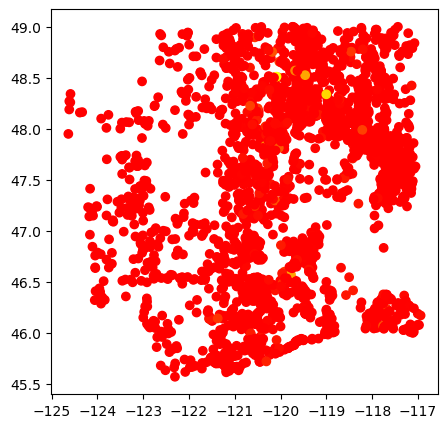

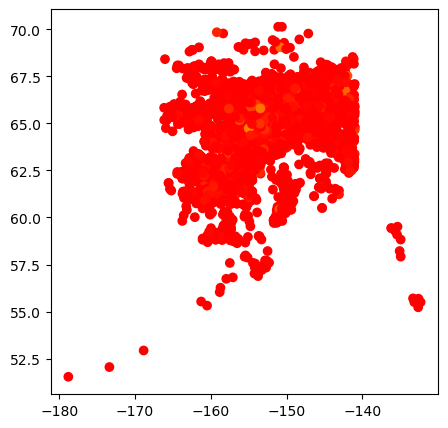

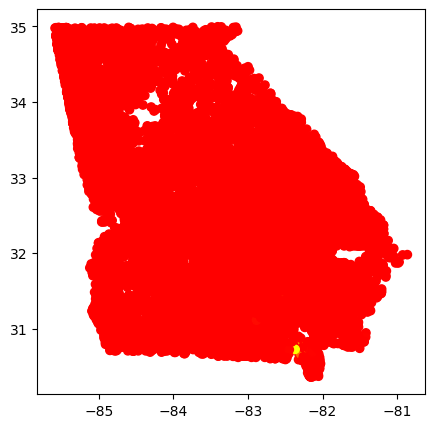

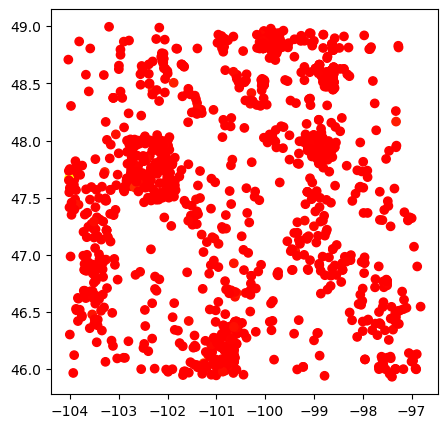

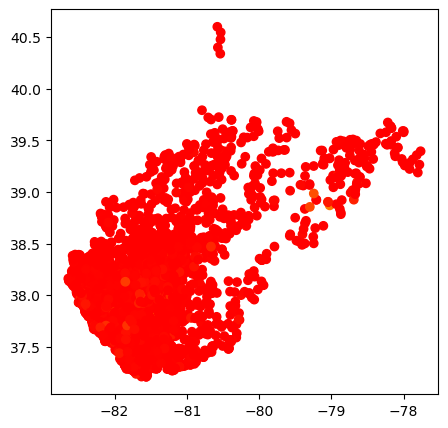

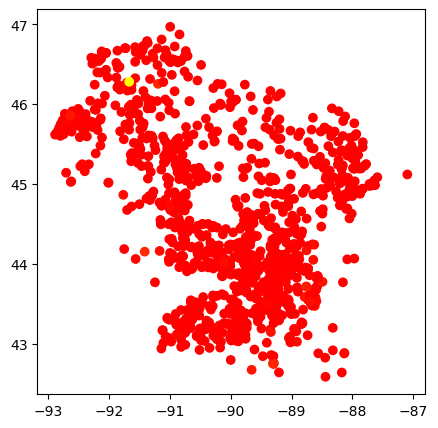

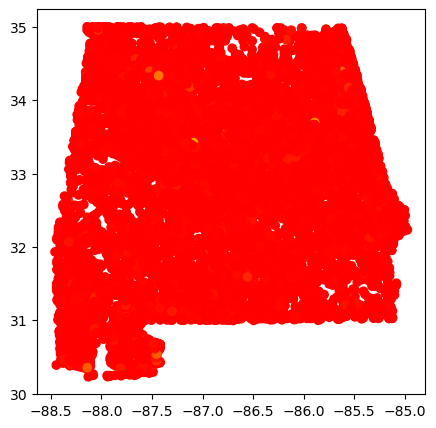

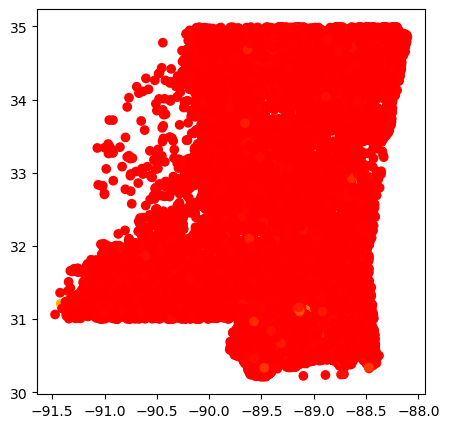

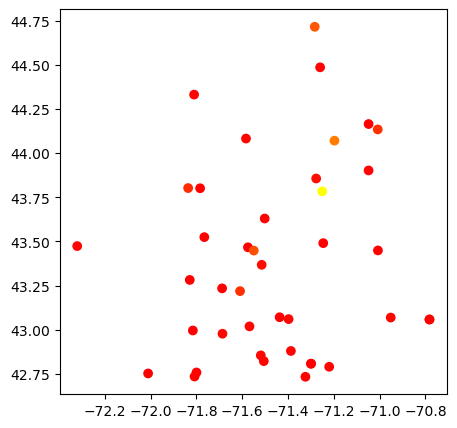

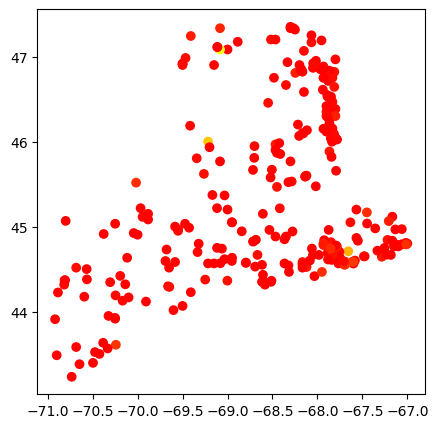

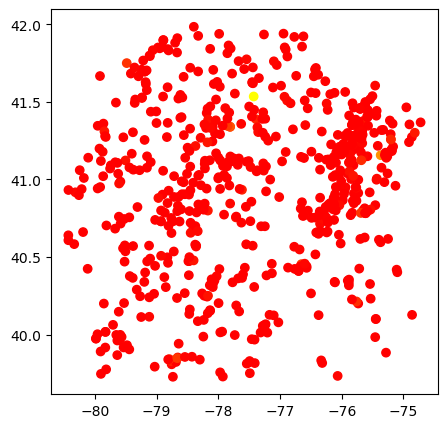

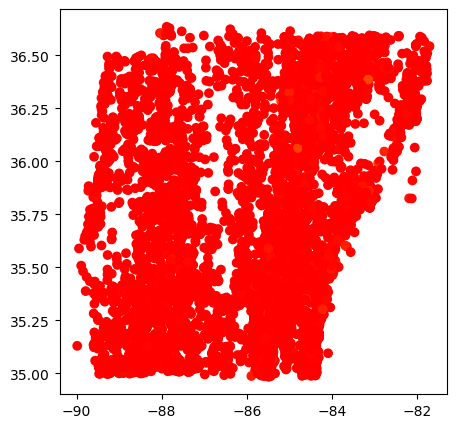

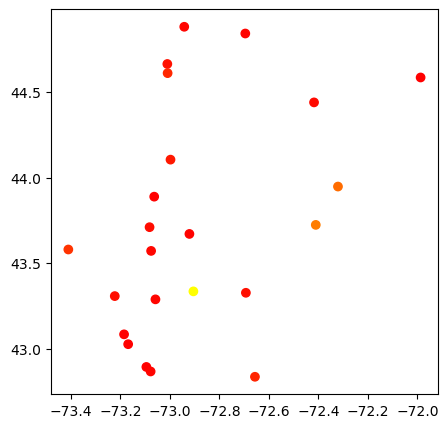

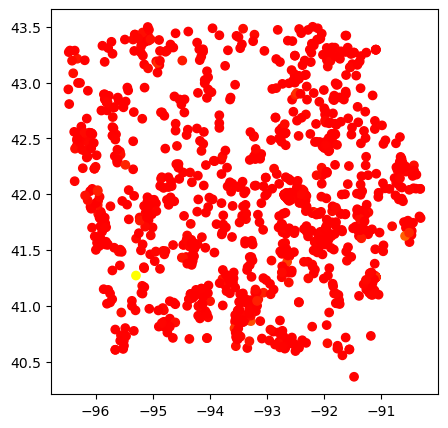

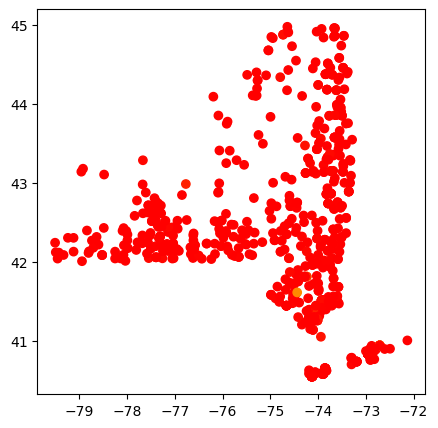

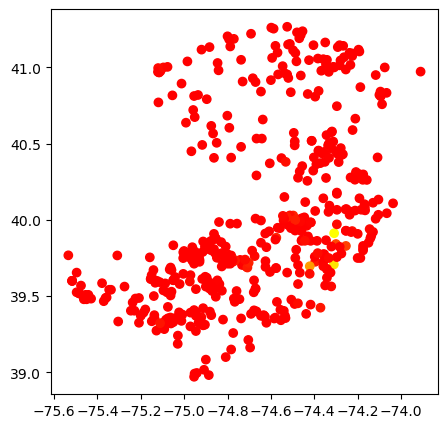

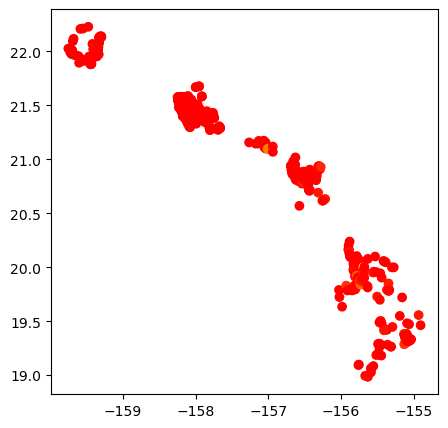

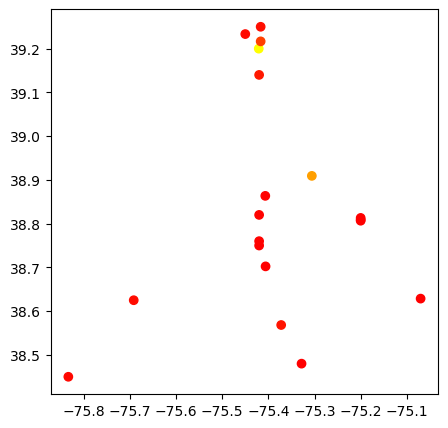

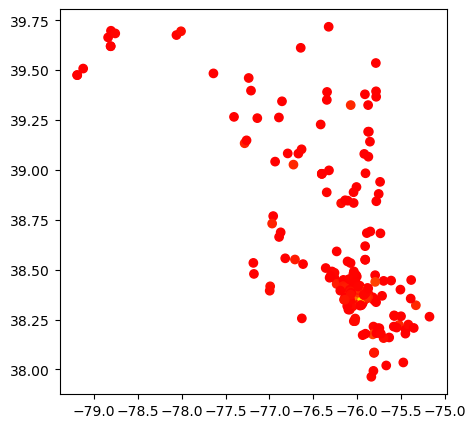

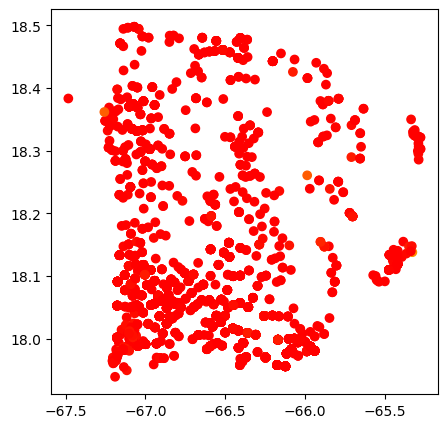

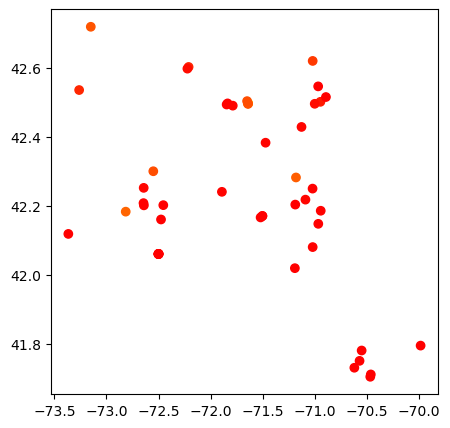

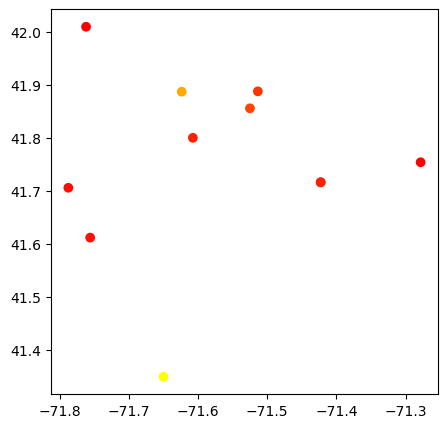

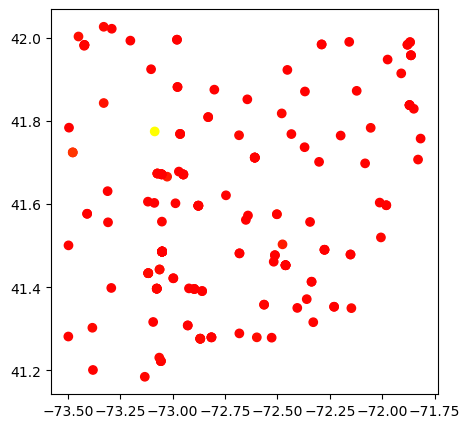

In [82]:
# PRINT THE each state MAP


states=df['state'].unique()


for i, state in enumerate(states):
    _df=df[df['state']==state]
    normalized_values = (_df['acres_burned'] - _df['acres_burned'].min()) / (_df['acres_burned'].max() - _df['acres_burned'].min())

    plt.scatter(x=_df['longitude'], y=_df['latitude'],c=normalized_values, cmap="autumn", vmin = 0, vmax=1)
    plt.rcParams["figure.figsize"] = (5,5)
    plt.show()

### BQ4 Which are the 5 worst-affected states


<AxesSubplot:xlabel='state', ylabel='Total acres_burned per state'>

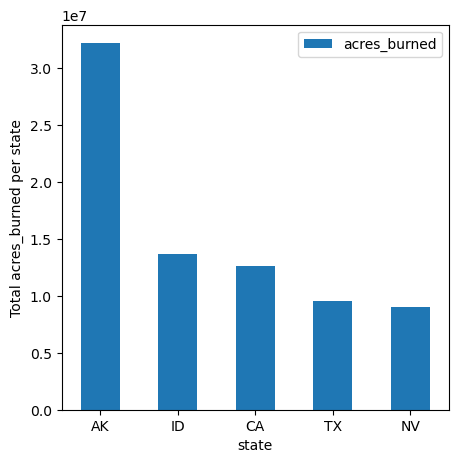

In [87]:
df.groupby('state').agg({'acres_burned':'sum'}
                       ).sort_values(by="acres_burned"
                                     , ascending = False).head().plot(kind='bar'
                                                                      , ylabel='Total acres_burned per state',rot=0)

#### BQ5 For the worst affected state, find the top 5 years with the largest total coverage of fires

In [96]:
affected5 = df.groupby('state').agg({'acres_burned':'sum'}).sort_values(by="acres_burned", ascending = False)[:5]
affected5.reset_index(inplace=True)

state  acres_burned
0    AK  3.222601e+07
1    ID  1.366231e+07
2    CA  1.261078e+07
3    TX  9.588463e+06
4    NV  9.006310e+06

In [92]:
df.head()

fire_name  acres_burned state   latitude   longitude  fire_year  \
16         Power       16823.0    CA  38.523333 -120.211667       2004   
17         Freds        7700.0    CA  38.780000 -120.260000       2004   
25      Bachelor          10.0    NM  33.315833 -105.512222       2004   
37    Howard gap          50.3    NC  35.000278  -83.351111       2005   
39  Austin creek         125.0    NC  36.001667  -81.590000       2005   

   discovery_date contain_date  fire_month  days_burning  
16     2004-10-06   2004-10-21        10.0          15.0  
17     2004-10-13   2004-10-17        10.0           4.0  
25     2004-07-20   2004-07-20         7.0           0.0  
37     2005-01-27   2005-01-28         1.0           1.0  
39     2005-02-12   2005-02-13         2.0           1.0

In [103]:
# df[['state','fire_year']] # .apply(lambda x: x in affected5['state'])#[df['state'] ==  affected5['state']]

df.query('state=="AK"').groupby('fire_year').agg({"acres_burned":"sum"})


acres_burned
fire_year              
1992       1.424447e+05
1993       6.866305e+05
1994       2.616047e+05
1995       4.376260e+04
1996       5.984072e+05
1997       2.025818e+06
1998       1.206034e+05
1999       1.005597e+06
2000       7.561614e+05
2001       2.197077e+05
2002       2.186329e+06
2003       6.013995e+05
2004       6.591431e+06
2005       4.635536e+06
2006       2.543659e+05
2007       6.341360e+05
2008       9.226770e+04
2009       2.949289e+06
2010       1.137138e+06
2011       2.927164e+05
2012       3.003448e+05
2013       1.320518e+06
2014       2.334264e+05
2015       5.136373e+06

In [104]:
# sort values in descending
df.query('state=="AK"').groupby('fire_year').agg({"acres_burned":"sum"}).\
    sort_values(by='acres_burned', ascending=False).head()


acres_burned
fire_year              
2004       6.591431e+06
2015       5.136373e+06
2005       4.635536e+06
2009       2.949289e+06
2002       2.186329e+06

<AxesSubplot:xlabel='fire_year', ylabel='Total acres burned for that specific year'>

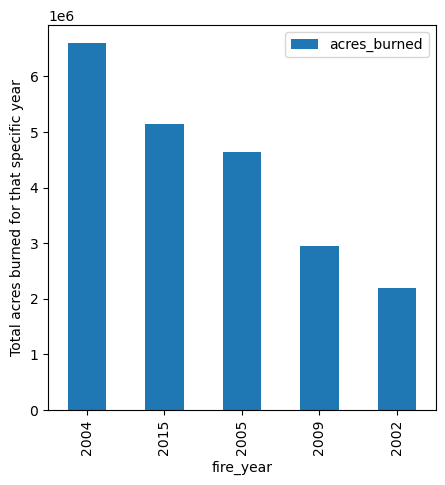

In [108]:

_df=df.query('state=="AK"').groupby('fire_year').agg({"acres_burned":"sum"}).sort_values(by='acres_burned', ascending=False).head()
_df.plot(kind='bar', ylabel='Total acres burned for that specific year')

#### BQ5b For the wors affected state, which was the most devastating year